In [5]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
# Add the latitudes and longitudes to a list. unpack our lat_lngs zip object into a list
coordinates = list(lat_lngs)

In [8]:
# import the citipy module 
from citipy import citipy

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

603

In [10]:
# 1. Import our dependencies and initialize counters and an empty list that will hold the weather data.

# Import the datetime module from the datetime library.
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key


In [53]:
# Build the basic URL for the OpenWeatherMap
url = "http://api.openweathermap.org/data/2.5/weather?q="

In [54]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [56]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # 3. Group the cities in sets of 50 to log the process as we find the weather data for each city.
    if (i % 50 == 0 and i >= 50):
        # # Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
        set_count += 1
        record_count = 1
    # 4 Build the city_url or endpoint for each city.
    city_url = url + city.replace(" ","+") + "&units=imperial&appid=" + weather_api_key

    # 5 Log the URL and the record and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# 6 Make an API request for each city.
    try:
        # 7. Parse the JSON weather data for the following:
            # # City, country, and date
            # # Latitude and longitude
            # # Maximum temperature
            # # Humidity
            # # Cloudiness
            # # Wind speed
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # 8. Add the data to a list in a dictionary format and then convert the list to a DataFrame.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 4 of Set 13 | bethel
Processing Record 5 of Set 13 | lasa
Processing Record 6 of Set 13 | butaritari
Processing Record 7 of Set 13 | namatanai
Processing Record 8 of Set 13 | saint-philippe
Processing Record 9 of Set 13 | victoria
Processing Record 10 of Set 13 | soeng sang
Processing Record 11 of Set 13 | punta arenas
Processing Record 12 of Set 13 | barrow
Processing Record 13 of Set 13 | xai-xai
Processing Record 14 of Set 13 | cape town
Processing Record 15 of Set 13 | samusu
City not found. Skipping...
Processing Record 16 of Set 13 | san lorenzo
Processing Record 17 of Set 13 | davila
Processing Record 18 of Set 13 | puerto ayora
Processing Record 19 of Set 13 | hithadhoo
Processing Record 20 of Set 13 | san juan
Processing Record 21 of Set 13 | angelholm
City not found. Skipping...
Processing Record 22 of Set 13 | albany
Processing Record 23 of Set 13 | chuy
Processing Record 24 of Set 13 | bilma
Processing Record 25 of Set 13 | mataura
Processing Record 26 of 

Processing Record 35 of Set 16 | gorom-gorom
Processing Record 36 of Set 16 | thompson
Processing Record 37 of Set 16 | grinnell
Processing Record 38 of Set 16 | ziro
Processing Record 39 of Set 16 | pangkalanbuun
Processing Record 40 of Set 16 | peace river
Processing Record 41 of Set 16 | cedartown
Processing Record 42 of Set 16 | belmonte
Processing Record 43 of Set 16 | chingola
Processing Record 44 of Set 16 | santa cruz de la palma
Processing Record 45 of Set 16 | capinzal
Processing Record 46 of Set 16 | mchinji
Processing Record 47 of Set 16 | montepuez
Processing Record 48 of Set 16 | kaeo
Processing Record 49 of Set 16 | vila franca do campo
Processing Record 50 of Set 16 | changtu
Processing Record 1 of Set 17 | cap malheureux
Processing Record 2 of Set 17 | oranjestad
Processing Record 3 of Set 17 | shimoda
Processing Record 4 of Set 17 | hami
Processing Record 5 of Set 17 | litoral del san juan
City not found. Skipping...
Processing Record 6 of Set 17 | puerto escondido
Pr

Processing Record 19 of Set 20 | yar-sale
Processing Record 20 of Set 20 | la reforma
Processing Record 21 of Set 20 | mabay
Processing Record 22 of Set 20 | naryan-mar
Processing Record 23 of Set 20 | rudbar
Processing Record 24 of Set 20 | norwich
Processing Record 25 of Set 20 | mungeli
Processing Record 26 of Set 20 | samalaeulu
City not found. Skipping...
Processing Record 27 of Set 20 | jacareacanga
Processing Record 28 of Set 20 | saleaula
City not found. Skipping...
Processing Record 29 of Set 20 | marau
Processing Record 30 of Set 20 | quthing
Processing Record 31 of Set 20 | dolbeau
City not found. Skipping...
Processing Record 32 of Set 20 | suntar
Processing Record 33 of Set 20 | caiaponia
Processing Record 34 of Set 20 | turukhansk
Processing Record 35 of Set 20 | alenquer
Processing Record 36 of Set 20 | avera
Processing Record 37 of Set 20 | sisimiut
Processing Record 38 of Set 20 | tual
Processing Record 39 of Set 20 | silale
Processing Record 40 of Set 20 | talakan
Pro

City not found. Skipping...
Processing Record 4 of Set 24 | togur
Processing Record 5 of Set 24 | taoudenni
Processing Record 6 of Set 24 | tahe
Processing Record 7 of Set 24 | aflu
City not found. Skipping...
Processing Record 8 of Set 24 | liverpool
Processing Record 9 of Set 24 | tshikapa
Processing Record 10 of Set 24 | les cayes
Processing Record 11 of Set 24 | kawalu
Processing Record 12 of Set 24 | guatire
Processing Record 13 of Set 24 | puerto el triunfo
Processing Record 14 of Set 24 | high level
Processing Record 15 of Set 24 | benito juarez
Processing Record 16 of Set 24 | nabire
Processing Record 17 of Set 24 | kautokeino
Processing Record 18 of Set 24 | coquimbo
Processing Record 19 of Set 24 | rawson
Processing Record 20 of Set 24 | zambezi
Processing Record 21 of Set 24 | whitehorse
Processing Record 22 of Set 24 | castanheira de pera
Processing Record 23 of Set 24 | shahr-e kord
Processing Record 24 of Set 24 | parrita
Processing Record 25 of Set 24 | el wasta
City not

In [57]:
len(city_data)

1096

In [58]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bethel,41.3712,-73.4140,63.10,94,100,3.00,US,2021-10-26 17:32:28
1,Lasa,46.6166,10.7002,54.48,82,49,5.19,IT,2021-10-26 17:32:29
2,Butaritari,3.0707,172.7902,81.93,77,37,12.82,KI,2021-10-26 17:32:29
3,Namatanai,-3.6667,152.4333,79.21,79,95,4.27,PG,2021-10-26 17:32:30
4,Saint-Philippe,-21.3585,55.7679,72.99,79,41,12.37,RE,2021-10-26 17:32:30
5,Victoria,22.2855,114.1577,78.85,85,100,4.00,HK,2021-10-26 17:31:22
6,Soeng Sang,14.4264,102.4606,69.03,92,99,3.69,TH,2021-10-26 17:32:31
7,Punta Arenas,-53.1500,-70.9167,50.11,66,20,34.52,CL,2021-10-26 17:32:31
8,Barrow,71.2906,-156.7887,24.82,86,90,9.22,US,2021-10-26 17:32:31
9,Xai-Xai,-25.0519,33.6442,70.90,88,32,7.83,MZ,2021-10-26 17:32:32


In [59]:
# reorder the columns
city_data_df = pd.DataFrame(city_data_df, columns=["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"])
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bethel,US,2021-10-26 17:32:28,41.3712,-73.4140,63.10,94,100,3.00
1,Lasa,IT,2021-10-26 17:32:29,46.6166,10.7002,54.48,82,49,5.19
2,Butaritari,KI,2021-10-26 17:32:29,3.0707,172.7902,81.93,77,37,12.82
3,Namatanai,PG,2021-10-26 17:32:30,-3.6667,152.4333,79.21,79,95,4.27
4,Saint-Philippe,RE,2021-10-26 17:32:30,-21.3585,55.7679,72.99,79,41,12.37
5,Victoria,HK,2021-10-26 17:31:22,22.2855,114.1577,78.85,85,100,4.00
6,Soeng Sang,TH,2021-10-26 17:32:31,14.4264,102.4606,69.03,92,99,3.69
7,Punta Arenas,CL,2021-10-26 17:32:31,-53.1500,-70.9167,50.11,66,20,34.52
8,Barrow,US,2021-10-26 17:32:31,71.2906,-156.7887,24.82,86,90,9.22
9,Xai-Xai,MZ,2021-10-26 17:32:32,-25.0519,33.6442,70.90,88,32,7.83


In [60]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [61]:
# Add Matplotlib inline magic command
%matplotlib inline

In [62]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [63]:
# Import the time module.
import time
# Get today's date in seconds.
today =time.strftime("%x")
today

'10/26/21'

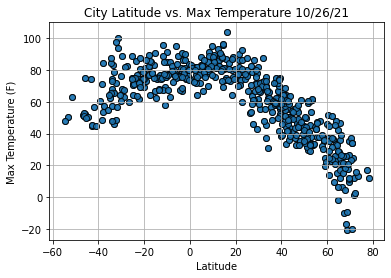

In [64]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

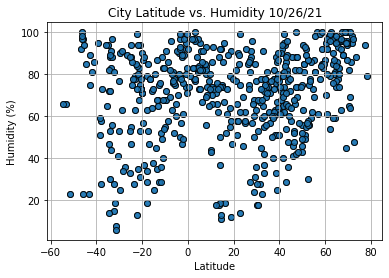

In [65]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

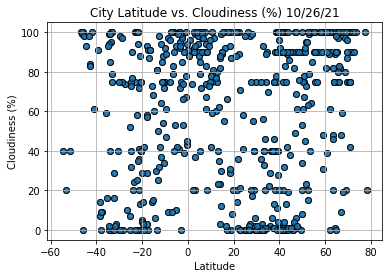

In [66]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

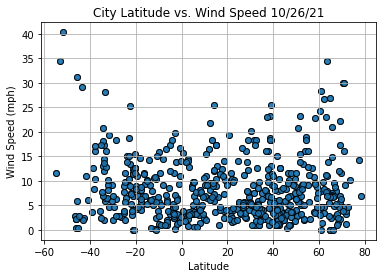

In [67]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [68]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [69]:
index13 = city_data_df.loc[13]

In [70]:
city_data_df["Lat"] >= 0

0        True
1        True
2        True
3       False
4       False
        ...  
1091    False
1092     True
1093    False
1094    False
1095    False
Name: Lat, Length: 1096, dtype: bool

In [71]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bethel,US,2021-10-26 17:32:28,41.3712,-73.4140,63.10,94,100,3.00
1,Lasa,IT,2021-10-26 17:32:29,46.6166,10.7002,54.48,82,49,5.19
2,Butaritari,KI,2021-10-26 17:32:29,3.0707,172.7902,81.93,77,37,12.82
5,Victoria,HK,2021-10-26 17:31:22,22.2855,114.1577,78.85,85,100,4.00
6,Soeng Sang,TH,2021-10-26 17:32:31,14.4264,102.4606,69.03,92,99,3.69


In [72]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

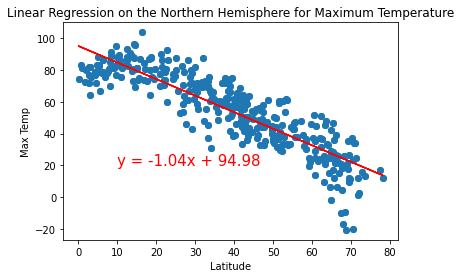

In [85]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,20))

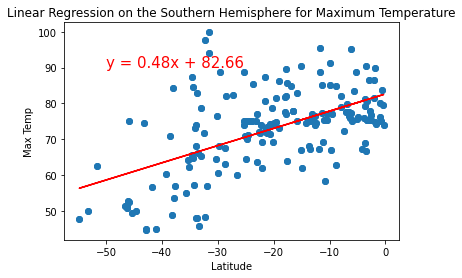

In [86]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))


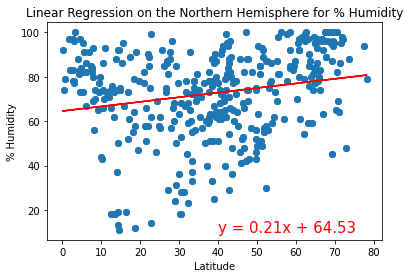

In [105]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

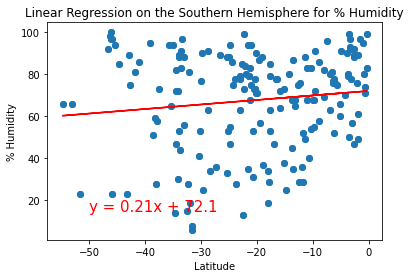

In [106]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

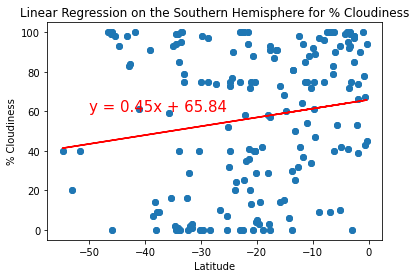

In [77]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

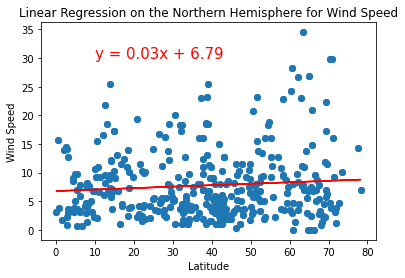

In [87]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(10,30))

In [88]:
# 6.4.2 Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Import linregress
    from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [89]:
#he loc method accesses a group of rows and columns in the current DataFrame by an index, labels, or a Boolean array.
index13 = city_data_df.loc[13]

In [90]:
# get all Northern Hemisphere latitudes, for latitudes greater than or equal to 0, we can filter the city_data_df DataFrame 
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bethel,US,2021-10-26 17:32:28,41.3712,-73.4140,63.10,94,100,3.00
1,Lasa,IT,2021-10-26 17:32:29,46.6166,10.7002,54.48,82,49,5.19
2,Butaritari,KI,2021-10-26 17:32:29,3.0707,172.7902,81.93,77,37,12.82
5,Victoria,HK,2021-10-26 17:31:22,22.2855,114.1577,78.85,85,100,4.00
6,Soeng Sang,TH,2021-10-26 17:32:31,14.4264,102.4606,69.03,92,99,3.69


In [91]:
# Create Northern and Southern Hemisphere DataFrames.
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
southern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Namatanai,PG,2021-10-26 17:32:30,-3.6667,152.4333,79.21,79,95,4.27
4,Saint-Philippe,RE,2021-10-26 17:32:30,-21.3585,55.7679,72.99,79,41,12.37
7,Punta Arenas,CL,2021-10-26 17:32:31,-53.1500,-70.9167,50.11,66,20,34.52
9,Xai-Xai,MZ,2021-10-26 17:32:32,-25.0519,33.6442,70.90,88,32,7.83
10,Cape Town,ZA,2021-10-26 17:28:00,-33.9258,18.4232,74.10,53,0,1.99


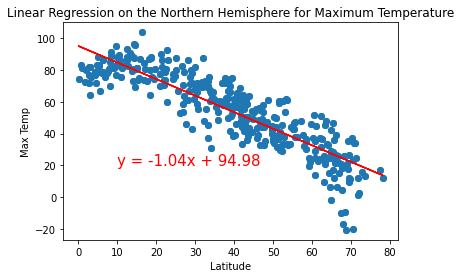

In [101]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,20))

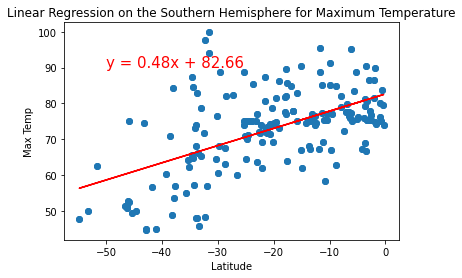

In [102]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

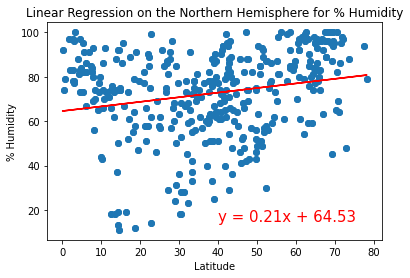

In [103]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,15))

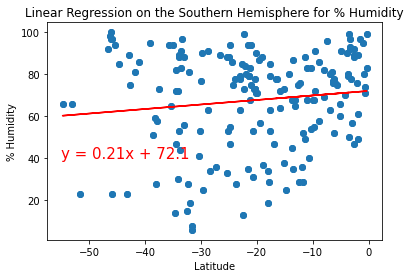

In [104]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-55,40))

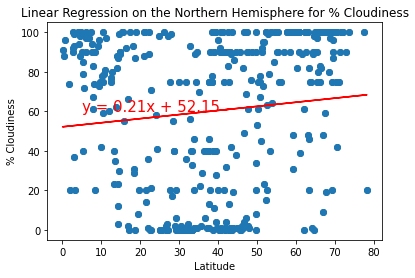

In [110]:
# SKILL DRILL Linear regression on the Northern Hemisphere Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(5,60))

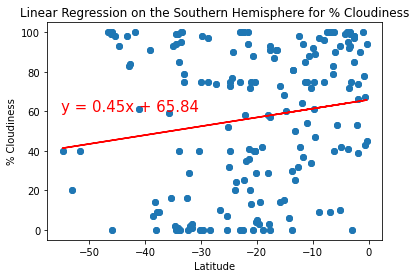

In [112]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-55,60))

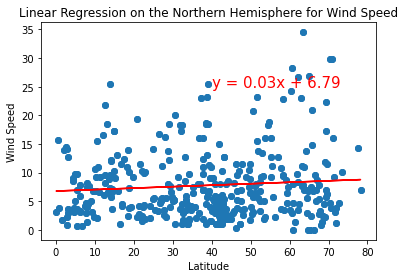

In [114]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,25))

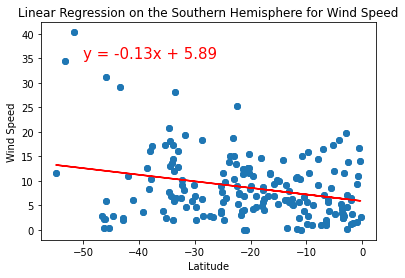

In [115]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))